# Binary classification

Let's look at one of the most fundamental types of machine learning task: a binary classification problem. By definition, there are two classes. You can think of them as a 'positive' and 'negative' class.

First we'll import some data. I'm using an extract from the Rock Property Catalog, https://subsurfwiki.org/wiki/Rock_Property_Catalog

In [1]:
import pandas as pd

df = pd.read_csv('https://geocomp.s3.amazonaws.com/data/RPC_simple.csv')

df.head()

,Vp,Vs,Rho_n,Lithology
0,3045.6,1595.7,2109.120585,sandstone
1,3000.6,1517.1,2090.342013,sandstone
2,3363.6,2041.5,2131.989982,sandstone
3,3195.3,1606.2,2184.939233,sandstone
4,4237.5,2448.6,2472.230768,sandstone


## Logistic regression

Let's look at the original binary classifier: logistic regression.

We will select a single feature, 

In [4]:
from sklearn.model_selection import train_test_split

X = df[['Rho_n']].values.reshape(-1, 1)
y = df.Lithology.values

X_train, X_val, y_train, y_val = train_test_split(X, y)

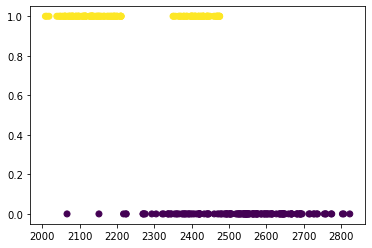

In [5]:
import matplotlib.pyplot as plt

def is_sand(y):
    return y=='sandstone'

plt.scatter(X_train, is_sand(y_train), c=is_sand(y_train), marker='o')

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

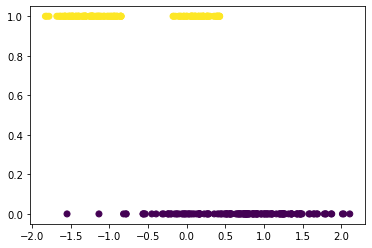

In [7]:
plt.scatter(X_train, is_sand(y_train), c=is_sand(y_train), marker='o')

### Train a model

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

clf.score(X_train, y_train)

0.76

In [9]:
clf.score(X_val, y_val)

0.84

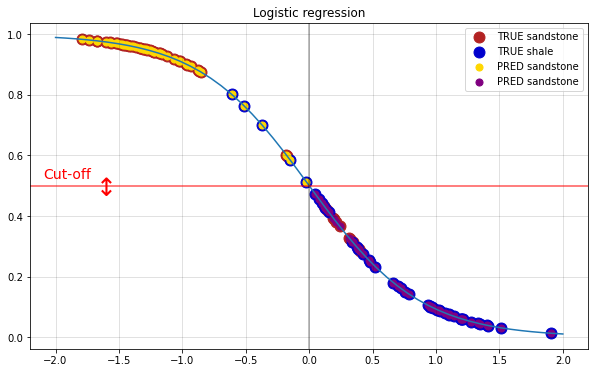

In [10]:
import numpy as np

def logistic(x, coef=1):
    return 1 / (1 + np.exp(coef * x))

# Compute and plot the logistic, so we can see it.
x = np.linspace(-2, 2)
L = logistic(x, np.squeeze(clf.coef_))
plt.figure(figsize=(10, 6))
plt.plot(x, L)

# Make y-coords for the validation data.
y_val_ = logistic(np.squeeze(X_val), np.squeeze(clf.coef_))

# Make a prediction.
y_pred = clf.predict(X_val)

# The TRUE labels.
plt.scatter(X_val[y_val=='sandstone'], y_val_[y_val=='sandstone'], c='firebrick', s=120, label='TRUE sandstone')
plt.scatter(X_val[y_val=='shale'], y_val_[y_val=='shale'], c='mediumblue', s=120, label='TRUE shale')

# The PREDICTED labels.
plt.scatter(X_val[y_pred=='sandstone'], y_val_[y_pred=='sandstone'], c='gold', s=50, label='PRED sandstone')
plt.scatter(X_val[y_pred=='shale'], y_val_[y_pred=='shale'], c='purple', s=50, label='PRED sandstone')

# Decoration.
plt.axhline(0.5, color='r', lw=2, alpha=0.5)
plt.text(-2.1, 0.525, 'Cut-off', fontsize=14, c='r')
plt.text(-1.6, 0.492, '↕', c='r', size=25, va='center', ha='center')
plt.axvline(0, color='k', lw=2, alpha=0.25)
plt.grid(color='k', alpha=0.15)
plt.title('Logistic regression')
plt.legend()
plt.show()

## Receiver operating characteristic

Read more about this here > https://en.wikipedia.org/wiki/Receiver_operating_characteristic

Basically, we're going to vary the **discrimination threshold** and look at its effect on **sensitivity** (aka *recall* or *true positive rate*) and **specificity** (aka *selectivity* or *true negative rate*), which is equal to 1 – *false positive rate*.

We want *sensitivity* and *specificity* to be high.

Note that in a binary problem, we're looking at things from the point of view of the 'positive' class, in other words the class with a `y` value of 1. In this case, it's sandstone.

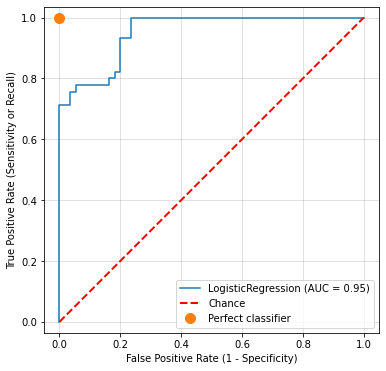

In [11]:
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(clf, X_val, y_val, ax=ax)
ax.plot([0, 1], linestyle='--', lw=2, color='r', label='Chance')
ax.plot([0], [1], 'o', c='C1', ms=10, label='Perfect classifier')
ax.set_xlabel('False Positive Rate (1 - Specificity)')
ax.set_ylabel('True Positive Rate (Sensitivity or Recall)')
ax.grid(c='k', alpha=0.15)
ax.axis('equal')
ax.legend()
plt.show()

## Add another feature

### EXERCISE

Let's use V<sub>P</sub> as well. You need to make a new `X`, split out the validation data, and scale the training and validation sets. Then you can train a new Logistic Regression classifier.

- What score do you get?
- Is it better than using just one feature?

Finally, make the ROC-AUC plot for this new classifier.

In [12]:
# YOUR CODE HERE



In [13]:
X = df[['Vp', 'Rho_n']].values

X_train, X_val, y_train, y_val = train_test_split(X, y)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

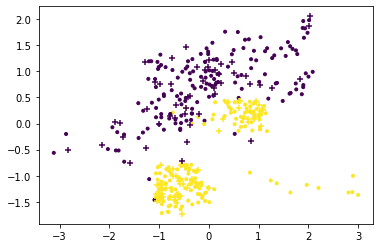

In [14]:
plt.scatter(*X_train.T, c=is_sand(y_train), marker='.')
plt.scatter(*X_val.T, c=is_sand(y_val), marker='+')

In [15]:
clf = LogisticRegression(fit_intercept=False)

clf.fit(X_train, y_train)

clf.score(X_train, y_train)

0.8966666666666666

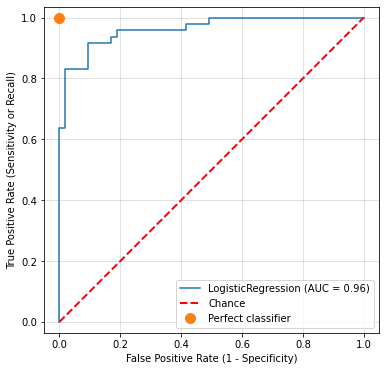

In [16]:
# Nothing here has changed, it's just a copy and paste from the previous ROC plot.
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(clf, X_val, y_val, ax=ax)
ax.plot([0, 1], linestyle='--', lw=2, color='r', label='Chance')
ax.plot([0], [1], 'o', c='C1', ms=10, label='Perfect classifier')
ax.set_xlabel('False Positive Rate (1 - Specificity)')
ax.set_ylabel('True Positive Rate (Sensitivity or Recall)')
ax.grid(c='k', alpha=0.15)
ax.axis('equal')
ax.legend()
plt.show()

It's much better (closer to the orange dot) than it was.

---

It's harder to visualize this thing; we have logistics in each dimension (feature) of the data:

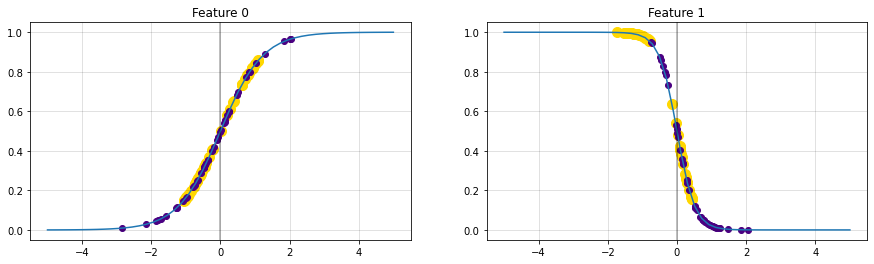

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))

for idx, ax in enumerate(axs):
    x = np.linspace(-5, 5)
    L = logistic(x, np.squeeze(clf.coef_)[idx])
    ax.plot(x, L)

    y_val_ = logistic(np.squeeze(X_val[:, idx]), np.squeeze(clf.coef_)[idx]) 

    ax.scatter(X_val[y_val=='sandstone', idx], y_val_[y_val=='sandstone'], c='gold', s=100)
    ax.scatter(X_val[y_val=='shale', idx], y_val_[y_val=='shale'], c='indigo')
    ax.axvline(0, color='k', lw=2, alpha=0.25)
    ax.grid(color='k', alpha=0.15)
    ax.set_title(f"Feature {idx}")

It's more natural to look at a decision boundary now:

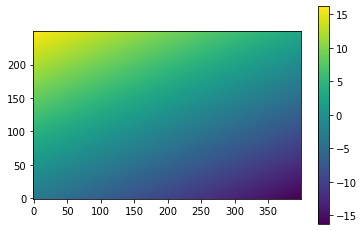

In [18]:
from utils import decision_regions

extent = [-4, 4, -2.5, 2.5]
y_pred, y_all = decision_regions(clf, X_val, y_val, extent, step=0.02)

plt.imshow(y_all, origin='lower')
plt.colorbar()

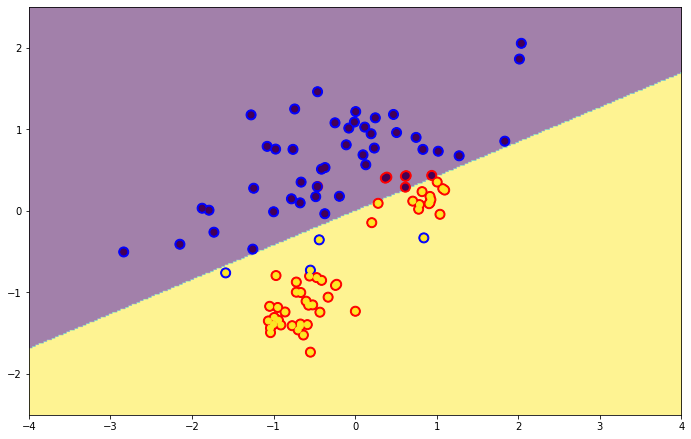

In [21]:
plt.figure(figsize=(12, 7.5))
plt.imshow(y_all < 0, extent=extent, origin='lower', aspect=1, alpha=0.5)
plt.scatter(*X_val.T, c=is_sand(y_val), s=100, cmap='bwr')
plt.scatter(*X_val.T, c=is_sand(y_pred))
plt.show()

---

## A simple SVM model

### EXERCISE

Implement a **support vector machine** (linear or non-linear, it's up to you) and compare its performance — the accuracy score and the ROC-AUC — with the logistic regression.

In [ ]:
# YOUR CODE HERE




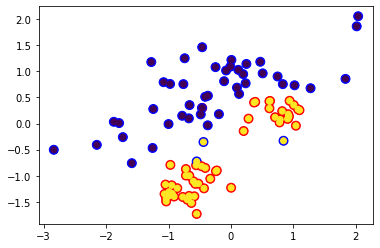

In [22]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

y_pred = svc.predict(X_val)

plt.scatter(*X_val.T, c=is_sand(y_val), s=80, cmap='bwr')
plt.scatter(*X_val.T, c=is_sand(y_pred))

In [23]:
svc.score(X_val, y_val)

0.96

---

Let's visualize the decision surface:

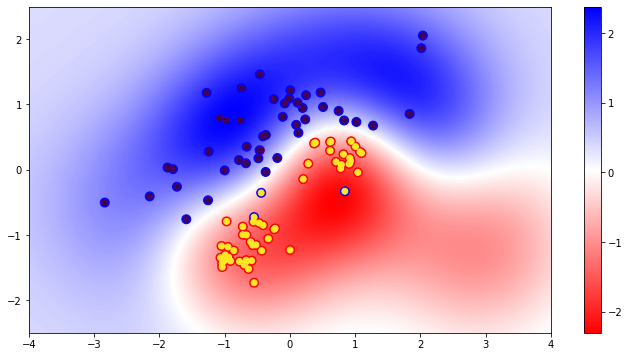

In [26]:
y_pred, y_all = decision_regions(svc, X_val, y_val, extent, step=0.02)

plt.figure(figsize=(12, 6))
im = plt.imshow(y_all, extent=extent, origin='lower', aspect=1, cmap='bwr_r')
plt.scatter(*X_val.T, c=is_sand(y_val), s=80, cmap='bwr')
plt.scatter(*X_val.T, c=is_sand(y_pred))
plt.colorbar(im)
plt.show()

Again, it's maybe easier to interpret as a boundary:

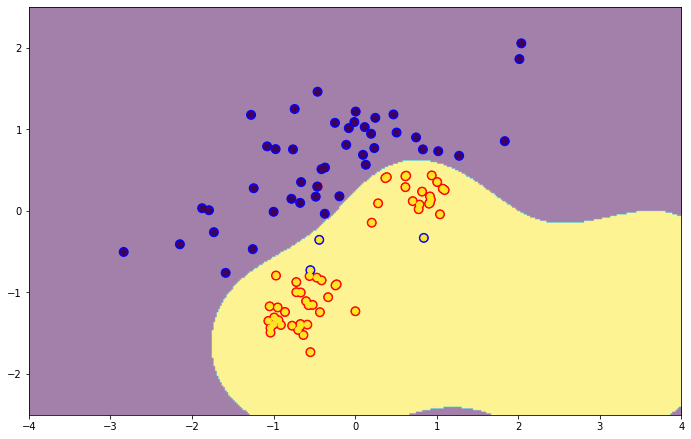

In [27]:
plt.figure(figsize=(12, 7.5))
plt.imshow(y_all < 0., extent=extent, origin='lower', aspect=1, alpha=0.5)
plt.scatter(*X_val.T, c=is_sand(y_val), s=80, cmap='bwr')
plt.scatter(*X_val.T, c=is_sand(y_pred))
plt.show()

**Aside** Note that the plotting code here uses the `decision_function` to make the decision surface plot, not the `predict_proba` method. The issue with `predict_proba` is that it sometimes emits P < 0.5 for the selected class. This reflects an issue with the 'Platt scaling' step (see [the documentation](https://scikit-learn.org/stable/modules/svm.html#scores-probabilities)). The catch with the decision function method is that the values it emits cannot be interpreted so easily as probabilities.

Anyway, how does the ROC-AUC look for this model?

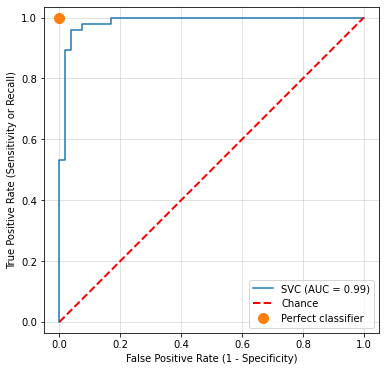

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(svc, X_val, y_val, ax=ax)
ax.plot([0, 1], linestyle='--', lw=2, color='r', label='Chance')
ax.plot([0], [1], 'o', c='C1', ms=10, label='Perfect classifier')
ax.set_xlabel('False Positive Rate (1 - Specificity)')
ax.set_ylabel('True Positive Rate (Sensitivity or Recall)')
ax.grid(c='k', alpha=0.15)
ax.axis('equal')
ax.legend()
plt.show()

Pretty good!
 
Both the accuracy score and the ROC-AUC are better than the logistic regression model, so we prefer the support vector machine.

--- 

&copy; 2020 Agile Scientific